**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Lootii Kiri<br/> 
Student Number: 300189957

# Exploratory Analysis

## Import important libraries

In [62]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [43]:
# List of raw GitHub URLs for each dataset
# Datasets were forked in my github
urls = {
    "glass": "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/01/glass.csv",
    "dermatology": "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/02/dermatology_database_1.csv",
    "maternal_health": "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv",
    "car": "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/04/car.data",
    "wineQT": "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/05/WineQT.csv",
    "16P": "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/06/16P.csv",
    "train": "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/07/train.csv"
}

In [44]:
for name, url in urls.items():
    try:
        # for 'train' dataset to suppress DtypeWarning
        if name == 'train':
            datasets[name] = pd.read_csv(url, dtype={26: str})
        # handle encoding for '16P'
        elif name == '16P':
            datasets[name] = pd.read_csv(url, encoding='ISO-8859-1')
        else:
            datasets[name] = pd.read_csv(url)
        print(f"Dataset '{name}' loaded successfully!")
    except Exception as e:
        print(f"Error loading dataset '{name}': {e}")



Dataset 'glass' loaded successfully!
Dataset 'dermatology' loaded successfully!
Dataset 'maternal_health' loaded successfully!
Dataset 'car' loaded successfully!
Dataset 'wineQT' loaded successfully!
Dataset '16P' loaded successfully!
Dataset 'train' loaded successfully!


Below I used the Pandas Head() function which returns the first 5 rows of the DataFrame. 
The purpose of this is to to verify successful loading by displaying its content.
https://www.w3schools.com/python/pandas/ref_df_head.asp


In [45]:
for name, df in datasets.items():
    print(f"\nFirst few rows of '{name}' dataset:")
    print(df.head())


First few rows of 'glass' dataset:
   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type of glass
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0              1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0              1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0              1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0              1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0              1

First few rows of 'dermatology' dataset:
   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  folli

## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values?

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.1 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

In [46]:
# Your code goes here
# Function to check for missing values and multiple underscores in each dataset
def analyze_missing_values(datasets):
    missing_info = {}
    
    for name, df in datasets.items():
        # Check for NaN values
        nan_summary = df.isnull().sum()
        
        # Check for other placeholders like '?' or empty strings
        placeholder_summary = (df == '?').sum() + (df == '').sum()
        
        # Check specifically for multiple underscores ('___')
        underscore_summary = df.apply(lambda col: col.apply(lambda x: isinstance(x, str) and '___' in x)).sum()
        
        # Combine NaN, placeholders, and invalid underscores into total missing values
        total_missing = nan_summary + placeholder_summary + underscore_summary
        
        # Only keep columns with missing values or placeholders
        missing_columns = total_missing[total_missing > 0]
        
        if not missing_columns.empty:
            missing_info[name] = {
                'missing': missing_columns,
                'underscores': underscore_summary[underscore_summary > 0]  # only keep columns with invalid underscores
            }
            print(f"\nMissing values in dataset '{name}':")
            print(missing_columns)
            if not underscore_summary[underscore_summary > 0].empty:
                print(f"Invalid underscores found in dataset '{name}':")
                print(underscore_summary[underscore_summary > 0])
        else:
            print(f"\nNo missing values in dataset '{name}'.")
    
    return missing_info

# Analyze missing values in the datasets
missing_values_info = analyze_missing_values(datasets)




No missing values in dataset 'glass'.

Missing values in dataset 'dermatology':
age    8
dtype: int64

No missing values in dataset 'maternal_health'.

No missing values in dataset 'car'.

No missing values in dataset 'wineQT'.

Missing values in dataset 'train':
Name                        9985
Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64
Invalid underscores found in dataset 'train':
Occupation    7062
dtype: int64

No missing values in dataset '16P'.


## Handling Missing Data in Numerical Columns: Imputation Strategies 
https://insightsoftware.com/blog/how-to-handle-missing-data-values-while-data-cleaning/

Data imputation involves replacing missing values with substituted values to maintain the dataset’s completeness for further analysis. Different strategies can be employed depending on the nature of the dataset and the missing data. Below, I have outlined some common strategies for handling missing data and gave a Python code example for replacing missing values in a numerical column.

### 1. Dropping Rows with Missing Values
One common method is to remove any rows containing missing values. This method, however, can result in the loss of significant amounts of data, especially if many rows have missing data. It’s useful when the dataset is large and missing values are minimal.

### 2. Imputation with Constant Values
Missing values can also be replaced with a constant.

### 3. Mean or Median Imputation
This approach is popular for numerical columns. Missing values are replaced with the mean or median of that column. The mean is used for normally distributed data, while the median is better suited for skewed data.

**Advantages:**

- It retains data size, which is important in smaller datasets.
- It is simple and quick to apply.

**Disadvantages:**

- It can introduce bias, especially in skewed distributions, as the mean or median does not account for relationships with other variables.

### 4. Imputation Using Other Columns
In more complex cases, you can leverage the relationships between columns. For example, in the dataset, coloumns for annual income and amount invested monthly might have a relation so you might use the mean or median salary specific to each amount invested monthly to fill missing values in the Salary column.

### Imputation for Categorical Columns
Missing values in categorical columns can be handled in several ways one of them being:

- Replace with the most frequent category (mode). so for the missing values( all of the underscores) in occupation, replaceing it with the most occuring occupation in the list could be a solution.

Different imputation strategies suit different cases, depending on the type of missing data and the importance of accuracy versus simplicity. In scenarios where data size is crucial, imputation methods like replacing with the mean or predicting using algorithms ensure that valuable data is not lost.


### Imputation Code Example Description

The following code defines a function `impute_missing_values_with_mean` which handles missing values in the **'Monthly_Balance'** column of the dataset named **'train'** in my dictionary of datasets. The function replaces missing values with the column's mean value. Below is an explanation of the steps I implemented to do so:

1. **Function Definition:**
   - The function `impute_missing_values_with_mean` takes a dictionary of datasets as an argument. 

2. **Looping Through Datasets:**
   - The function iterates through each dataset using a `for` loop. It checks if the dataset name is 'train' (as I am only interested in the 'train' dataset for this imputation as an example).

3. **Checking for 'Monthly_Balance' Column:**
   - Inside the 'train' dataset, the code checks whether the column **'Monthly_Balance'** exists. If it does, it proceeds to handle the missing values in that column.

4. **Converting Column to Numeric:**
   - The function ensures that the **'Monthly_Balance'** column is converted to a numeric format using `pd.to_numeric()`. Any errors (e.g., invalid values) are coerced into `NaN`.
   https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

5. **Calculating the Mean:**
   - The mean of the **'Monthly_Balance'** column is calculated.

6. **Filling Missing Values:**
   - The missing values (NaN) in the **'Monthly_Balance'** column are replaced with the computed mean value using the `fillna()` method.
   https://www.w3schools.com/python/pandas/ref_df_fillna.asp

7. **Result Feedback:**
   - A message is printed indicating that missing values in the **'Monthly_Balance'** column have been replaced with the column's mean value. If the column does not exist, a message indicates this.

8. **Calling the Function:**
   - The function `impute_missing_values_with_mean` is then called with the datasets to perform the imputation.

9. **Verification:**
   - After imputation, I performed a check to verify if there are any remaining missing values in the **'Monthly_Balance'** column by printing the number of missing values in the column. If result is 0, then imputation is all good!




In [54]:
def impute_missing_values_with_mean(datasets):
    for name, df in datasets.items():
        if name == 'train':
            # 'Monthly_Balance' column and its missing values
            if 'Monthly_Balance' in df.columns:
                # Convert 'Monthly_Balance' column to numeric, forcing errors to NaN
                df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
                
                # Calculate mean of the 'Monthly_Balance' column
                mean_value = df['Monthly_Balance'].mean()
                
                # Replace missing values (NaNs) with the mean value
                df['Monthly_Balance'] = df['Monthly_Balance'].fillna(mean_value)
                
                print(f"\nReplaced missing values in 'Monthly_Balance' for dataset '{name}' with mean: {mean_value:.2f}")
            else:
                print(f"\n' Monthly_Balance' column not found in dataset '{name}'.")

# call the function to perform the imputation
impute_missing_values_with_mean(datasets)

# Verify missing values in 'Monthly_Balance' have been handled
print(datasets['train']['Monthly_Balance'].isnull().sum())

# Rerun the analyze missing values function and notice that Monthly_Balance with 1200 missing values is no longer there.
analyze_missing_values(datasets)





Replaced missing values in 'Monthly_Balance' for dataset 'train' with mean: 402.55
0

No missing values in dataset 'glass'.

Missing values in dataset 'dermatology':
age    8
dtype: int64

No missing values in dataset 'maternal_health'.

No missing values in dataset 'car'.

No missing values in dataset 'wineQT'.

Missing values in dataset 'train':
Name                        9985
Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
dtype: int64
Invalid underscores found in dataset 'train':
Occupation    7062
dtype: int64

No missing values in dataset '16P'.


{'dermatology': {'missing': age    8
  dtype: int64,
  'underscores': Series([], dtype: int64)},
 'train': {'missing': Name                        9985
  Occupation                  7062
  Monthly_Inhand_Salary      15002
  Type_of_Loan               11408
  Num_of_Delayed_Payment      7002
  Num_Credit_Inquiries        1965
  Credit_History_Age          9030
  Amount_invested_monthly     4479
  dtype: int64,
  'underscores': Occupation    7062
  dtype: int64}}

2. **Select and familiarize yourself with a classification task:** Choose one of e provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific plication? Do you possess expertise in this particular domain of application?


# Maternal Health Risk Classification Task

## 2. I selected the Maternal Health Dataset.
This dataset contains valuable information regarding maternal health risks. 

### Dataset Overview
- **Number of samples:** 1013
- **Number of attributes:** 6
- **Number of classes:** 3 (risk levels: high, medium, low)
- **Data Source:** https://archive.ics.uci.edu/dataset/863/maternal+health+risk . The data has been collected from various hospitals, community clinics, and maternal health care facilities in rural areas of Bangladesh through an IoT-based risk monitoring system.
- **Subject Area:** Health and Medicine

### Attributes
The features in this dataset are all integers:
- **Age**
- **Systolic Blood Pressure (SystolicBP)**
- **Diastolic Blood Pressure (DiastolicBP)**
- **Blood Sugar (BS)**
- **Body Temperature (BodyTemp)**
- **HeartRate**

The target variable is categorical: **RiskLevel**. These attributes are significant risk factors for maternal mortality, which is a major concern in achieving the Sustainable Development Goals (SDGs) set by the United Nations.

### Objective of the Task
The objective of this classification task is to predict the risk level (high, medium, or low) associated with maternal health based on various health attributes. This task is critical as it can assist healthcare professionals in identifying at-risk individuals, ultimately leading to timely interventions and improved maternal care.

### Domain Expertise
I do not have a strong educational background in medicine and am not a professional in this field. However, I am familiar with normal blood sugar levels due to having diabetic family members. Additionally, as an athlete who has taken courses on fitness and biology, I have an understanding of some of these attributes such as body temperature, heart rates, etc. This knowledge provides me with a basic understanding of the health parameters involved in this dataset, which can contribute to my analysis.


3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

# 3. Attribute Analysis

## 3.1 Informative Attribute Assessment
Analyzing the attributes in the **Maternal Health** dataset to determine their informativeness and relevance for the classification task:

### Informativeness Evaluation & Description
1. **Age**: This attribute is relevant as maternal age is a significant risk factor in maternal health. 
2. **Systolic Blood Pressure (SystolicBP)**: Elevated systolic blood pressure can indicate potential health risks during pregnancy.
3. **Diastolic Blood Pressure (DiastolicBP)**: Similar to systolic pressure, this attribute is crucial for assessing cardiovascular health and risks. "Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy." https://archive.ics.uci.edu/dataset/863/maternal+health+risk
4. **Blood Sugar (BS)**: Blood sugar levels are vital for understanding the risk of gestational diabetes and other complications.
5. **Body Temperature (BodyTemp)**: Body temperature can indicate infections or other health issues that may affect maternal health.
6. **Heart Rate**: Heart rate is important for assessing overall cardiovascular health and can indicate stress or complications.

### Conclusion
After analyzing each attribute, I conclude that **all features are relevant** for the classification task. Each attribute contributes valuable information for assessing maternal health risks and should be retained in the dataset to improve the effectiveness of the machine learning analysis.


In [55]:
# Load maternal health dataset
maternal_health_url = "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
df = pd.read_csv(maternal_health_url) 

#make sure its loaded return first few rows.
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


### Links that helped me make the boxplots and histograms: 

1. https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram

2. https://python-graph-gallery.com/20-basic-histogram-seaborn/


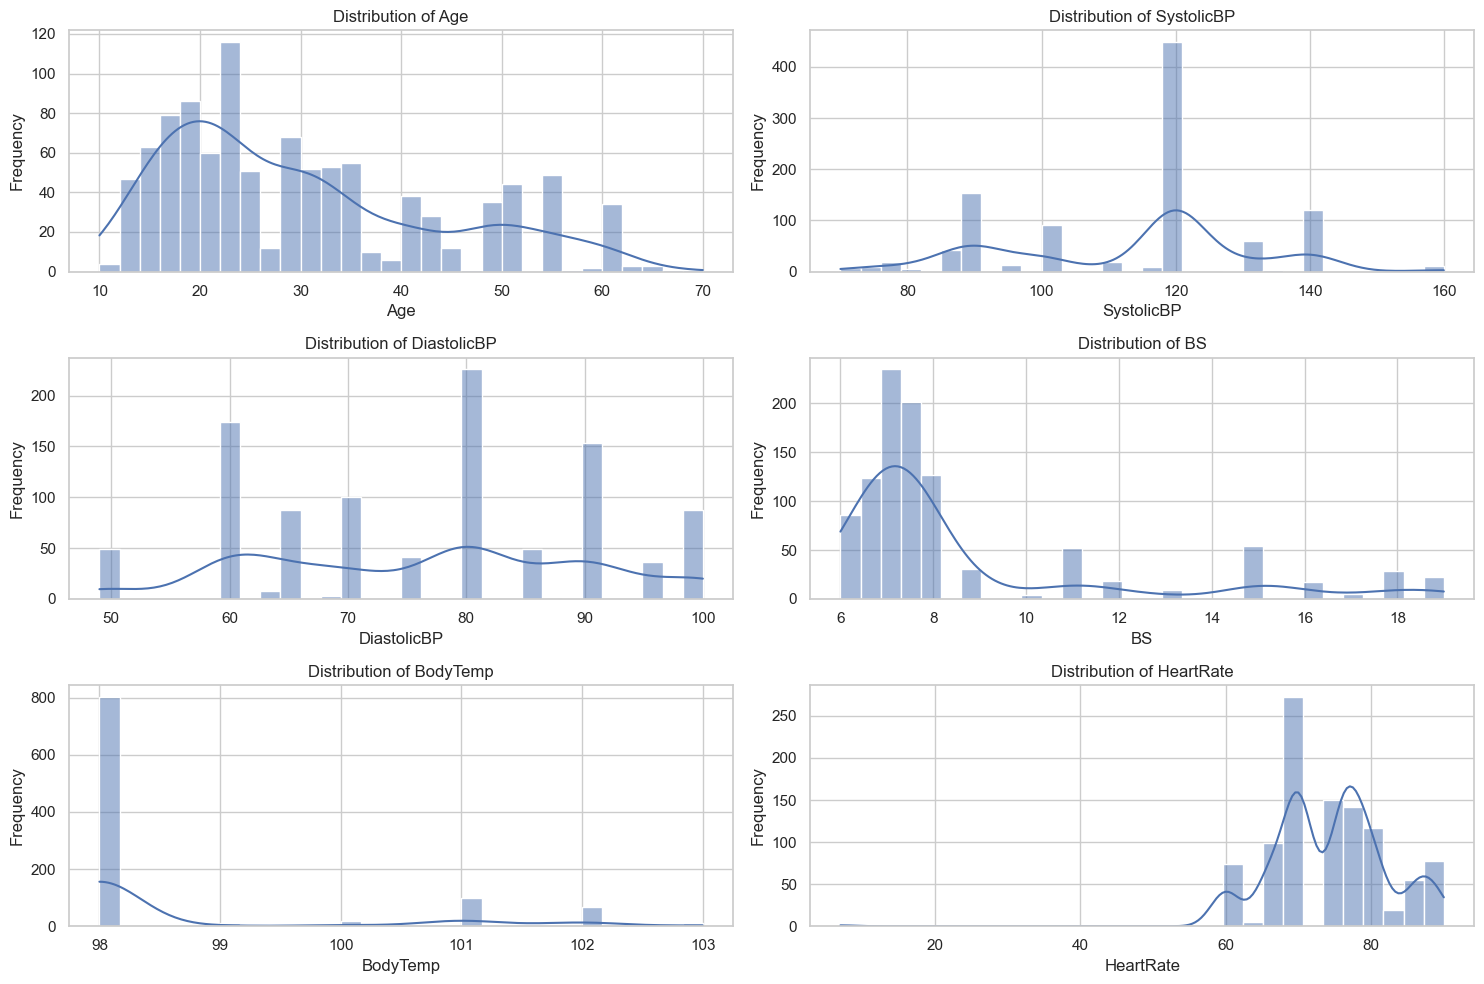

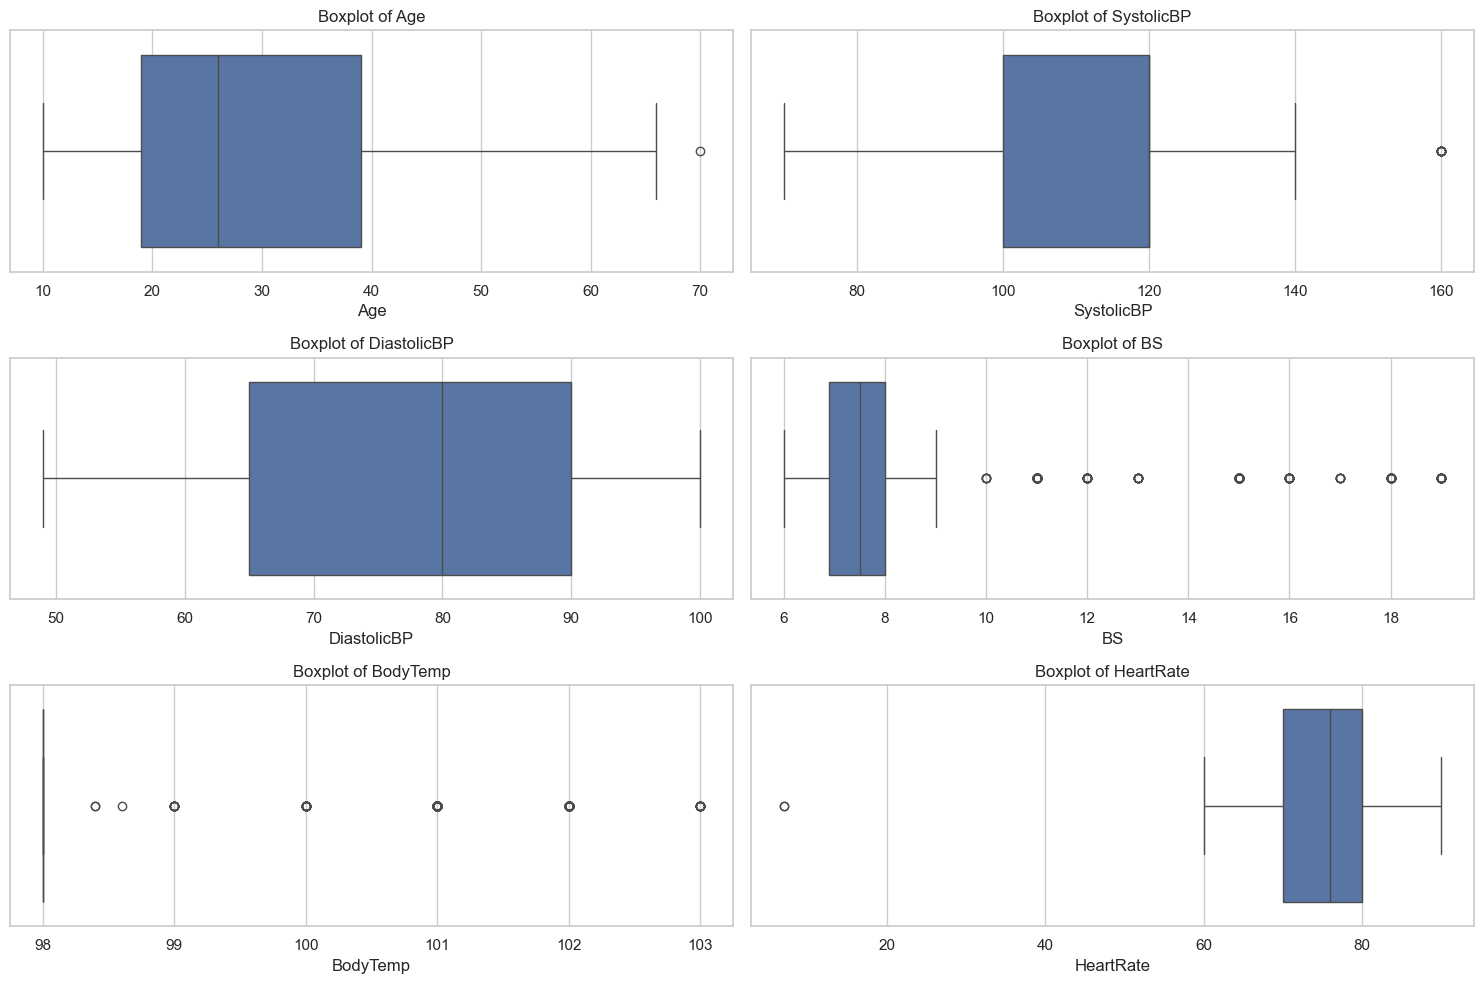

In [74]:
# Load the maternal health dataset
url = "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
df = pd.read_csv(url)

# style of the plots
sns.set(style="whitegrid")

# Define the attributes to analyze
attributes = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Create a figure for histograms
plt.figure(figsize=(15, 10))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 2, i)  # 3x2 grid of subplots
    sns.histplot(df[attribute], kde=True, bins=30)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create a figure for boxplots
plt.figure(figsize=(15, 10))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 2, i)  
    sns.boxplot(x=df[attribute])
    plt.title(f'Boxplot of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()

### 3.2 Examination of Attribute Distributions

In this section, I examined the distributions of each attribute in the **Maternal Health Risk** dataset using histograms and boxplots. The following patterns and insights have been identified:

#### 1. Age
- **Histogram**: The age distribution is subtly right-skewed, with a gradual decline. This suggests that while most samples are concentrated at younger ages, there is a tail extending toward older ages.
- **Boxplot**:
  - Q0: 10
  - Q1: 18
  - Median (Q2): 26
  - Q3: 39
  - Q4: 65
  
  The interquartile range indicates that 50% of the data falls between ages 18 and 39. The presence of outliers on the higher end indicates some individuals in the dataset are significantly older.

#### 2. Systolic Blood Pressure (SystolicBP)
- **Histogram**: The SystolicBP histogram resembles a bell curve with a strong peak at 120 mmHg, indicating this is a common reading among the subjects.
- **Boxplot**:
  - Q0: 68
  - Q1: 100
  - Median (not visible)
  - Q3: 120
  - Q4: 140
  
  The median line is not clearly visible, which may suggest that there are many values clustered around the lower quartiles. The highest values appear to be outliers, indicating a small group of subjects with very high blood pressure readings.

#### 3. Diastolic Blood Pressure (DiastolicBP)
- **Histogram**: The histogram displays a consistent low height across the bars, with notable peaks in the middle and on both extremes. This could indicate that most subjects have diastolic blood pressure readings around the middle range.
- **Boxplot**:
  - Q0: 49
  - Q1: 65
  - Q2: 80
  - Q3: 90
  - Q4: 100
  
  The interquartile range suggests a spread of values, with the bulk of subjects having diastolic readings between 65 and 90 mmHg.

#### 4. Blood Sugar (BS)
- **Histogram**: The distribution is right-skewed, indicating that lower blood sugar levels are more common.
- **Boxplot**:
  - Q0: 6
  - Q1: 7
  - Q2: 7.5
  - Q3: 8
  - Q4: 9
  
  This indicates that a significant number of subjects have low blood sugar readings, with a gradual increase in higher levels.

#### 5. Body Temperature (BodyTemp)
- **Histogram**: The distribution is right-skewed, with a high frequency of occurrences at the lower end, suggesting most subjects have lower body temperatures.
- **Boxplot**: The boxplot appears to lack clear quartiles, suggesting that all quartiles overlap, possibly indicating a lack of variability in the data.

#### 6. Heart Rate
- **Histogram**: The heart rate distribution is left-skewed, with most values concentrated at the lower end. The right side displays multiple peaks, indicating variability in readings.
- **Boxplot**:
  - Q0: 60
  - Q1: 70
  - Q2: 76
  - Q3: 80
  - Q4: 95
  
  The variation in heart rate suggests differing levels of fitness or health status among subjects, with some individuals exhibiting significantly higher heart rates.

### Summary
The analysis of histograms and boxplots reveals various underlying patterns within the **Maternal Health Risk** dataset. Significant skewness in several attributes indicates potential outliers and varying distributions, which may have implications for maternal health assessments and risk predictions.


4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

## 4. Class Distribution Analysis
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

I used a bar plot to visualize the frequency of instances for each class label within the **Maternal Health Risk** dataset. The target variable, **RiskLevel**, categorizes maternal health risk into three classes: **Low Risk**, **Medium Risk**, and **High Risk**.

# Class Distribution Visualization
The bar plot generated reveals the following frequencies for each risk category:
- **Low Risk**: Approximately 400 instances
- **Medium Risk**: Approximately 325 instances
- **High Risk**: Approximately 270 instances

# Balance Assessment
Upon examining the class distribution:
- The **Low Risk** class has the highest frequency, followed by the **Medium Risk** class, and finally the **High Risk** class with the lowest frequency.
- The difference in the number of instances across the classes indicates that the dataset is **imbalanced**. However it is not too drastic. 

# Implications of Imbalance
An imbalanced dataset can lead to challenges in training machine learning models, as the models may become biased towards the majority class (Low Risk). To ensure robust performance, it may be necessary to implement techniques such as resampling, class weighting, or using specialized algorithms designed to handle imbalanced datasets.



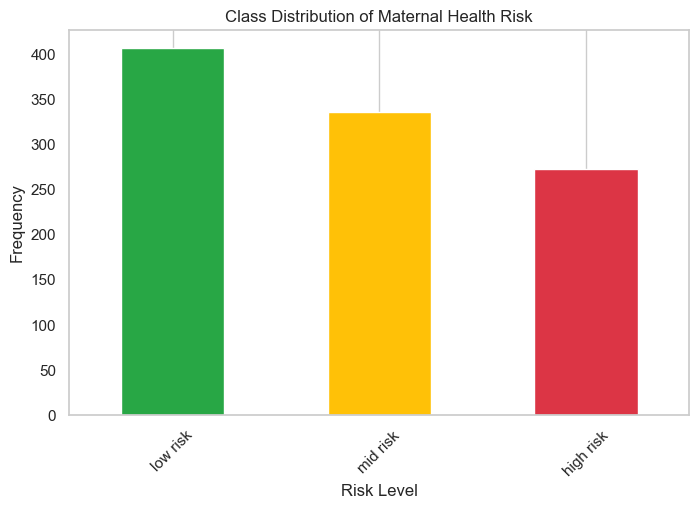

In [73]:
# Load the maternal health dataset
url = "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
df = pd.read_csv(url)

# Count the instances of each class
class_counts = df['RiskLevel'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['#28a745', '#ffc107', '#dc3545'])
plt.title('Class Distribution of Maternal Health Risk')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

# Recommended Transformation: Log Transformation

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/#:~:text=The%20log%20transformation%20is%2C%20arguably,normal%20or%20near%20normal%20distribution.

https://scikit-learn.org/stable/modules/preprocessing.html#

https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution

**Why Log Transformation?**

1. **Right Skewness**: Many numerical features in the Maternal Health dataset, such as **Age**, **Blood Sugar (BS)**, and **Body Temperature**, exhibit right skewness in their distributions. Log transformation is particularly effective at reducing skewness and bringing the distribution closer to normal. By applying a logarithmic scale, we can compress the higher values while expanding the lower values, leading to a more balanced distribution.

2. **Reducing Impact of Outliers**: Log transformation diminishes the influence of extreme values or outliers in the dataset. For example, if there are extremely high values for blood pressure or blood sugar, the log transformation can help mitigate their impact on the overall analysis, allowing the machine learning algorithms to focus more on the typical range of values.

4. **Interpretability**: In a healthcare context, log transformation can provide meaningful interpretations of the results. For instance, when analyzing risk factors for maternal health, understanding the impact of exponential growth (e.g., the relationship between blood sugar levels and health risks) can be more insightful when viewed on a logarithmic scale.

# Transformation code  
Below I provided code for both the log transformation on the Blood sugar attribute because that one has the most right skewed distribution.



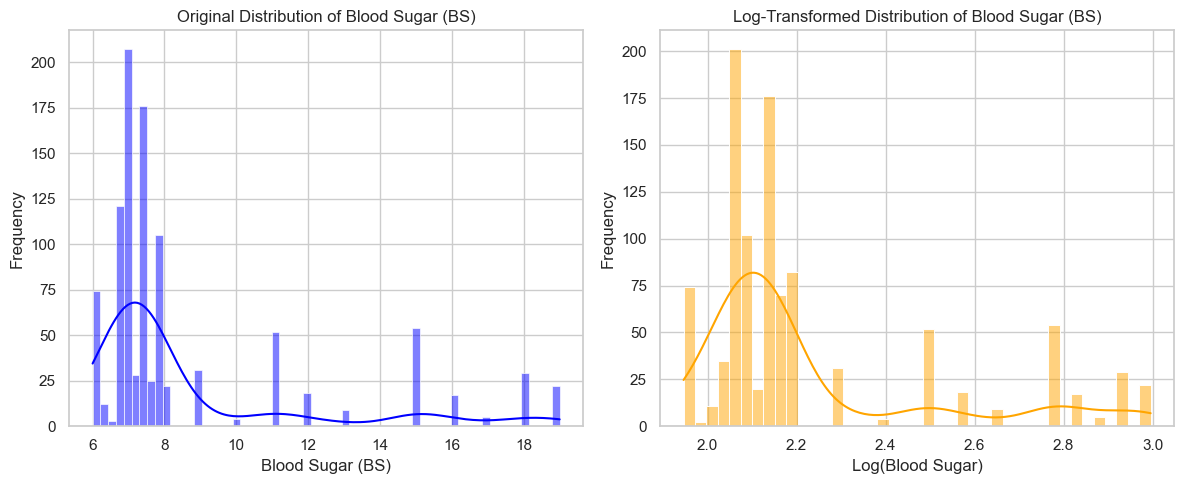

In [72]:
# Load the maternal health dataset
url = "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
df = pd.read_csv(url)

# Define custom transformer using FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)

# pipeline for transforming the data
pipeline = Pipeline([
    ('log_transform', log_transformer)
])

# Transform the Blood Sugar attribute
df['BS_log'] = pipeline.fit_transform(df[['BS']])

# Plotting original and transformed distributions
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(df['BS'], kde=True, color='blue')
plt.title('Original Distribution of Blood Sugar (BS)')
plt.xlabel('Blood Sugar (BS)')
plt.ylabel('Frequency')

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['BS_log'], kde=True, color='orange')
plt.title('Log-Transformed Distribution of Blood Sugar (BS)')
plt.xlabel('Log(Blood Sugar)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [71]:
# Load the maternal health dataset
url = "https://raw.githubusercontent.com/Lootii/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
df = pd.read_csv(url)

# target variable in last column 
target_column = df.columns[-1]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

print("\nUnique values in the target variable:")
print(df[target_column].unique())

# Apply one-hot encoding to the target variable because none of the attributes are categorical
encoded_target = encoder.fit_transform(df[[target_column]])

# DataFrame for encoded target
encoded_target_df = pd.DataFrame(encoded_target, columns=encoder.get_feature_names_out([target_column]))

# Show the one-hot encoded target variable
print("\nOne-Hot Encoded Risk Level:")
print(encoded_target_df.head())


Unique values in the target variable:
['high risk' 'low risk' 'mid risk']

One-Hot Encoded Risk Level:
   RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk
0                  1.0                 0.0                 0.0
1                  1.0                 0.0                 0.0
2                  1.0                 0.0                 0.0
3                  1.0                 0.0                 0.0
4                  0.0                 1.0                 0.0


6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [75]:
# Set target variable as 'y'
y = df['RiskLevel']  

# Set feature variables as 'X'
X = df.drop(columns=['RiskLevel']) 


7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [78]:
# Split the dataset into training and testing sets with 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes to confirm split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (811, 6)
Testing data shape: (203, 6)


--------------------------------------------------------------------------

# References

References to ALL sources used (articles, code, algorithms).

1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/#:~:text=The%20log%20transformation%20is%2C%20arguably,normal%20or%20near%20normal%20distribution.

2. https://scikit-learn.org/stable/modules/preprocessing.html#

3. https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution

4. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

5. https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram

6. https://python-graph-gallery.com/20-basic-histogram-seaborn/

7. https://archive.ics.uci.edu/dataset/863/maternal+health+risk

8. https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

9. https://www.w3schools.com/python/pandas/ref_df_fillna.asp

10. https://insightsoftware.com/blog/how-to-handle-missing-data-values-while-data-cleaning/

11.  https://www.w3schools.com/python/pandas/ref_df_head.asp

Links are also displayed throughout the documentation of my notebook to precise which areas I used a particular site as reference for.